# LIMPIEZA DE DATOS

#1. Problema

Rimac encarga a su área de marketing determinar posibles clientes que están interesados o no en adquirir un seguro.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por el área de marketing se encuentra en un archivo CSV (`dataset_Seguro.csv`) con 45215 filas y 17 columnas.

Cada columna contiene características y una categoría "yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto. 

Las columnas son:

1. "edad":  edad (numérica)
2. "trabajo": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "estado_civil": estado civil (categórica: "married", "divorced", "single")
4. "educacion": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "atrasado": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "ahorro": saldo de sus ahorros (numérica)
7. "hipoteca": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "tarjeta": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contacto": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "dia": último día del mes en el que fue contactada (numérica)
11. "mes": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duracion": duración en segundos del último contacto (numérica)
13. "numcontac": número total de veces que fue contactada durante la campaña (numérica)
14. "dias_p": número de días transcurridos después de haber sido contactado antes de la campaña actual, numérica. -1 indica que no fue contactado previamente)
15. "llamadas_antes": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "resultado_antes": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "resultado_ahora": categoría ¿el cliente adquirió un seguro? (categórica: "yes", "no")

#3. Pasos previos a la limpieza

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura
data = pd.read_csv('dataset_Seguro.csv')

In [3]:
print(data.shape)
data.head()

(45215, 17)


,edad,trabajo,estado_civil,educacion,atrasado,ahorro,hipoteca,tarjeta,contacto,dia,mes,duracion,numcontact,dias_p,llamadas_antes,resultado_antes,resultado_ahora
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
edad               45215 non-null int64
trabajo            45213 non-null object
estado_civil       45214 non-null object
educacion          45214 non-null object
atrasado           45215 non-null object
ahorro             45213 non-null float64
hipoteca           45215 non-null object
tarjeta            45215 non-null object
contacto           45215 non-null object
dia                45215 non-null int64
mes                45215 non-null object
duracion           45214 non-null float64
numcontact         45215 non-null int64
dias_p             45214 non-null float64
llamadas_antes     45215 non-null int64
resultado_antes    45215 non-null object
resultado_ahora    45215 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [5]:
data.head()


,edad,trabajo,estado_civil,educacion,atrasado,ahorro,hipoteca,tarjeta,contacto,dia,mes,duracion,numcontact,dias_p,llamadas_antes,resultado_antes,resultado_ahora
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas.
2. Columnas irrelevantes que no responden al problema que queremos resolver.
3. Registros (filas) repetidos.
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos limpio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros, el número total de registros (filas) debería ser 45.215. Sin embargo columnas como "trabajo", "estado_civil", "educacion", "ahorro", "duracion" y "dias_p".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
edad               45207 non-null int64
trabajo            45207 non-null object
estado_civil       45207 non-null object
educacion          45207 non-null object
atrasado           45207 non-null object
ahorro             45207 non-null float64
hipoteca           45207 non-null object
tarjeta            45207 non-null object
contacto           45207 non-null object
dia                45207 non-null int64
mes                45207 non-null object
duracion           45207 non-null float64
numcontact         45207 non-null int64
dias_p             45207 non-null float64
llamadas_antes     45207 non-null int64
resultado_antes    45207 non-null object
resultado_ahora    45207 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [7]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'atrasado', 'hipoteca',
       'tarjeta', 'contacto', 'mes', 'resultado_antes', 'resultado_ahora']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna atrasado: 2 subniveles
Columna hipoteca: 2 subniveles
Columna tarjeta: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado_antes: 6 subniveles
Columna resultado_ahora: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [8]:
data.describe()

,edad,ahorro,dia,duracion,numcontact,dias_p,llamadas_antes
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [9]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

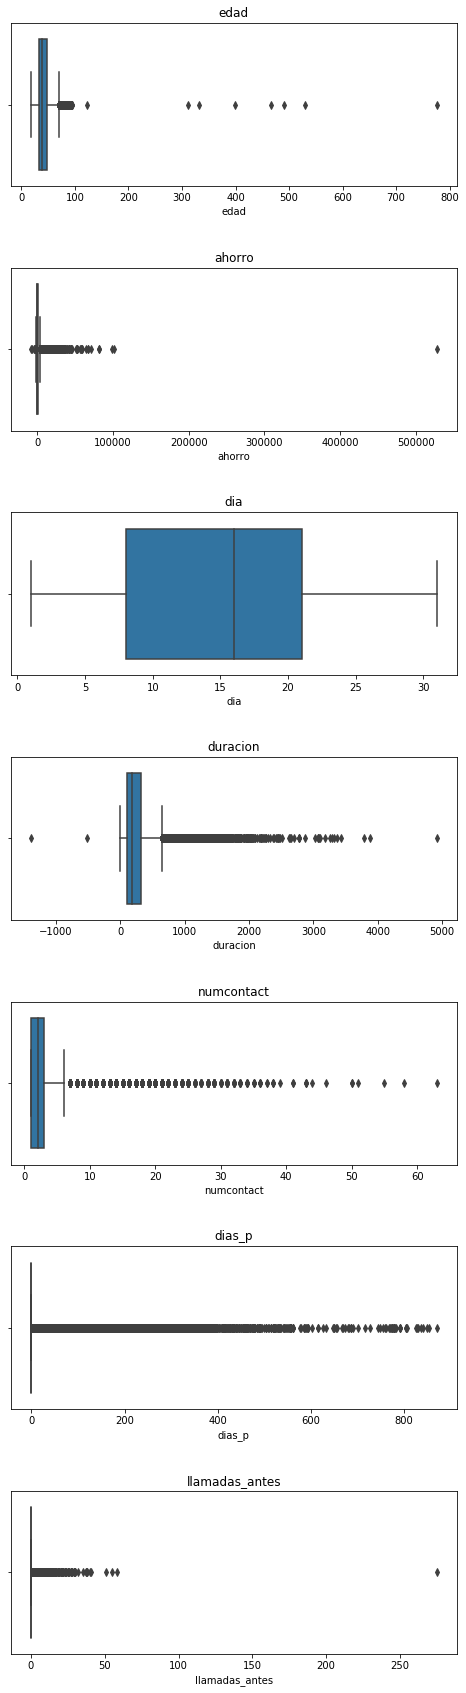

In [10]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'ahorro', 'dia', 'duracion', 'numcontact',
            'dias_p', 'llamadas_antes']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "edad": hay sujetos con edades mucho mayores a 100 años
- "duracion": hay valores negativos
- "llamadas_antes": hay un valor extremadamente alto (cercano a 300)

In [11]:
# Eliminar filas con "edad">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['edad']<=100]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [12]:
# Eliminar filas con "duracion"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['duracion']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


In [13]:
# Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de llamadas_antes: {data.shape}')
data = data[data['llamadas_antes']<=100]
print(f'Tamaño del set después de eliminar registros de llamadas_antes: {data.shape}')

Tamaño del set antes de eliminar registros de llamadas_antes: (45190, 17)
Tamaño del set después de eliminar registros de llamadas_antes: (45189, 17)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

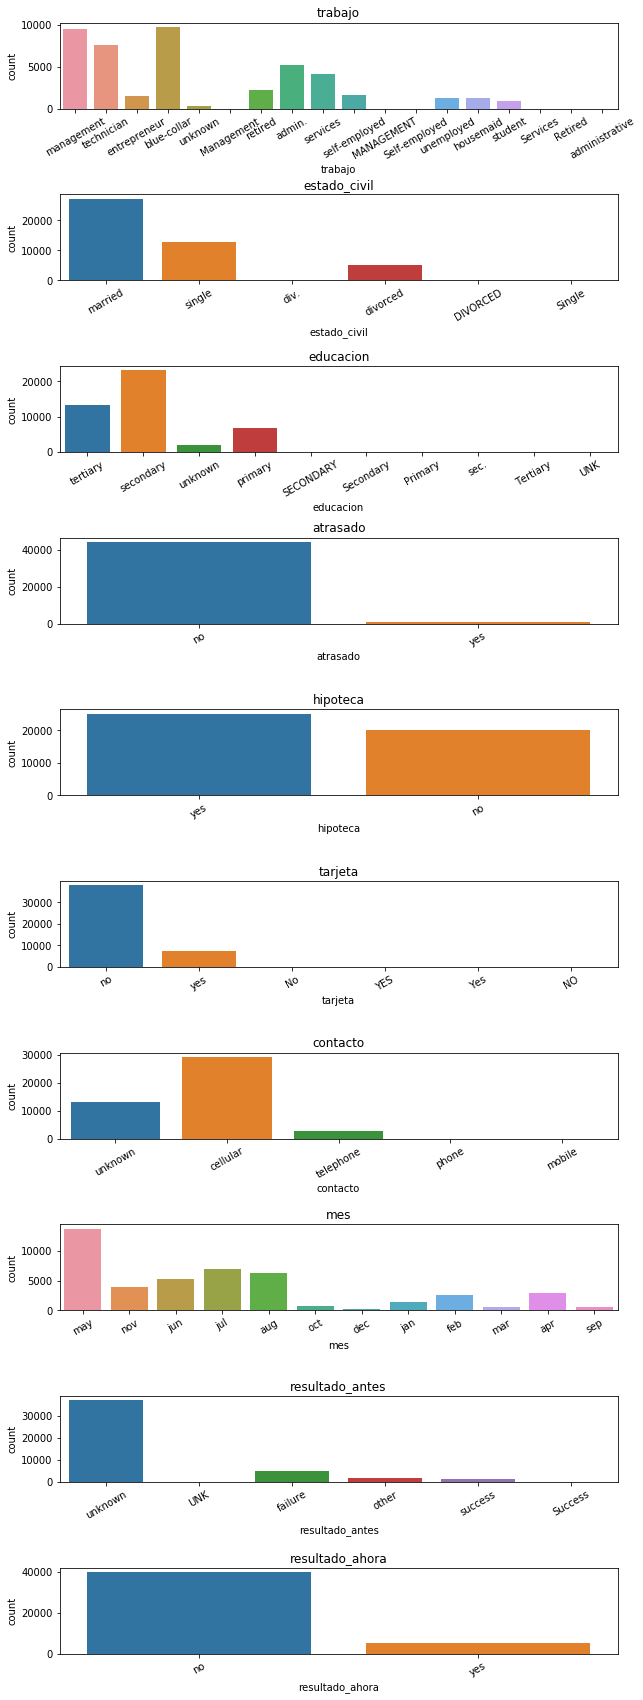

In [14]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'atrasado', 'hipoteca',
       'tarjeta', 'contacto', 'mes', 'resultado_antes', 'resultado_ahora']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

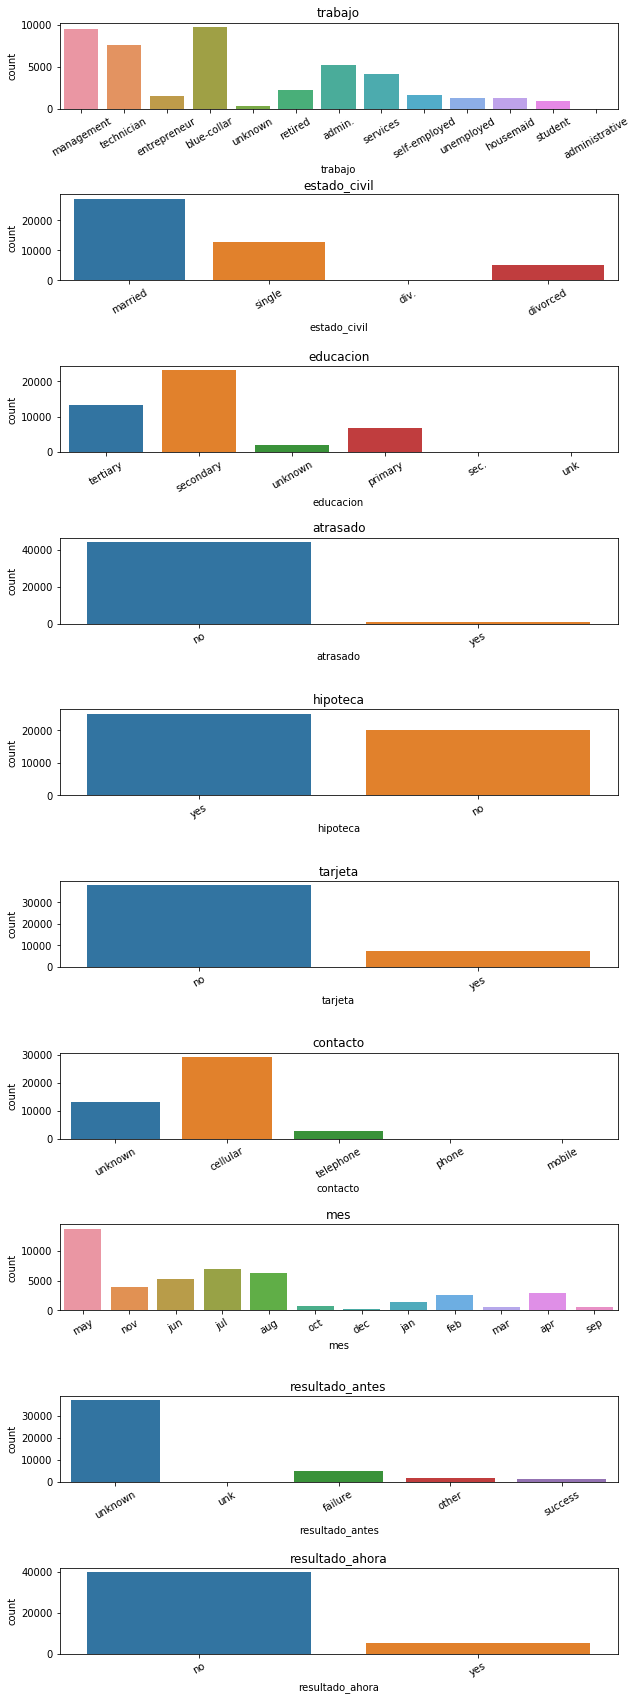

In [15]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [16]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [17]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [18]:
# education: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [19]:
# contact: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contacto'] = 'telephone'
data.loc[data['contacto']=='mobile','contacto'] = 'cellular'
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [20]:
# poutcome: unificar unk y unknown
print(data['resultado_antes'].unique())
data.loc[data['resultado_antes']=='unk','resultado_antes']='unknown'
print(data['resultado_antes'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [21]:
data.shape

(45189, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [22]:
import os

ruta = os.path.expanduser("~/Downloads/dataset_Seguros_Limpia.csv")
data.to_csv(ruta, index=False)